In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

### Foldseek search command on HULK

In [ ]:
srun -t 3-0 -p compute -w super004 -c 32 foldseek easy-search 1MTY_D.pdb /fast/databases/foldseek/afdb/afdb50 aln tmp --num-iterations 3

In [3]:
cd /mnt/researchdrive/Kaustubh/MMO/data/foldseek_search

/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search


### <span style="color:#F0F0C9"> **----------------------2025-04-15----------------------** </span>

In [ ]:
## Collecting the Uniprot identifiers from the AF-hits

cut -f2 aln | sed "s/AF-//g" | sed "s/-F1-model_v4//g" > aln_uniprot_ids.txt

Use `https://www.uniprot.org/id-mapping` to map the ids from aln_uniprot_ids.txt

Downloaded the tsv file from there -- into `/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_uniprot_info/`

In [ ]:
gunzip idmapping_2025_04_15.tsv.gz

## Downloading the hit AF-protein structures

In [ ]:
cut -f2 aln > ./hit_AF_structures_database/AF_hit_ids.txt

cd hit_AF_structures_database

for i in `cat AF_hit_ids.txt`; do wget "https://alphafold.ebi.ac.uk/files/"$i".pdb"; done

### Performing Foldmason MSA

In [ ]:
conda install -c conda-forge -c bioconda foldseek

mkdir Foldmason_MSA/

foldmason easy-msa ./*.pdb ./Foldmason_MSA/MMO_foldmason_MSA tmpFolder --report-mode 1
mv tmpFolder/ ./Foldmason_MSA/

### Making a sequence alignment out of this

In [ ]:
cd /mnt/researchdrive/Kaustubh/MMO/data/foldseek_search
mkdir sequences

cp /mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/Foldmason_MSA/MMO_foldmason_MSA_aa.fa ./sequences/
cd sequences
sed '/^>/!s/-//g' MMO_foldmason_MSA_aa.fa > MMO_foldmason_aa.fasta

## Reading the output from the foldseek search

In [2]:
foldseek_output = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/aln", header=None, names=["query","target","fident","alnlen","mismatch","gapopen","qstart","qend","tstart","tend","evalue","bits"], sep="\t")
foldseek_output['uniprot_id'] = foldseek_output['target'].str.replace("AF-","")
foldseek_output['uniprot_id'] = foldseek_output['uniprot_id'].str.replace("-F1-model_v4","")
foldseek_output['log_evalue'] = -np.log10(foldseek_output['evalue'])
foldseek_output

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,evalue,bits,uniprot_id,log_evalue
0,1MTY_D,AF-A0A4R8HNW2-F1-model_v4,0.824,512,90,0,1,512,15,526,3.945000e-66,3445,A0A4R8HNW2,65.403953
1,1MTY_D,AF-Q7R763-F1-model_v4,0.995,416,2,0,91,506,2,417,5.636000e-56,2840,Q7R763,55.249029
2,1MTY_D,AF-Q842H7-F1-model_v4,0.836,397,65,0,53,449,2,398,2.276000e-47,2397,Q842H7,46.642828
3,1MTY_D,AF-A0A395D1H6-F1-model_v4,0.849,378,57,0,1,378,15,392,1.815000e-46,2381,A0A395D1H6,45.741123
4,1MTY_D,AF-Q8KM74-F1-model_v4,0.820,400,72,0,48,447,1,400,7.360000e-47,2362,Q8KM74,46.133122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,1MTY_D,AF-A0A355RYZ4-F1-model_v4,0.066,435,277,18,26,437,1,329,2.445000e-05,60,A0A355RYZ4,4.611721
1971,1MTY_D,AF-A0A838DB80-F1-model_v4,0.081,370,230,13,48,369,1,308,2.134000e-03,58,A0A838DB80,2.670806
1972,1MTY_D,AF-A0A3C1NUY1-F1-model_v4,0.064,463,288,21,12,403,12,400,1.187000e-04,58,A0A3C1NUY1,3.925549
1973,1MTY_D,AF-A0A7S0K516-F1-model_v4,0.044,587,315,18,1,428,23,522,1.703000e-04,56,A0A7S0K516,3.768785


(array([472., 740., 398.,  63.,  29.,  51.,  43.,  33.,  11.,   8.,   2.,
          4.,  14.,   2.,   8.,  12.,  13.,  10.,   6.,   2.,   6.,   3.,
          4.,   5.,   4.,   2.,   2.,   3.,   1.,   1.,   2.,   2.,   4.,
          1.,   2.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  37.  ,   71.08,  105.16,  139.24,  173.32,  207.4 ,  241.48,
         275.56,  309.64,  343.72,  377.8 ,  411.88,  445.96,  480.04,
         514.12,  548.2 ,  582.28,  616.36,  650.44,  684.52,  718.6 ,
         752.68,  786.76,  820.84,  854.92,  889.  ,  923.08,  957.16,
         991.24, 1025.32, 1059.4 ,

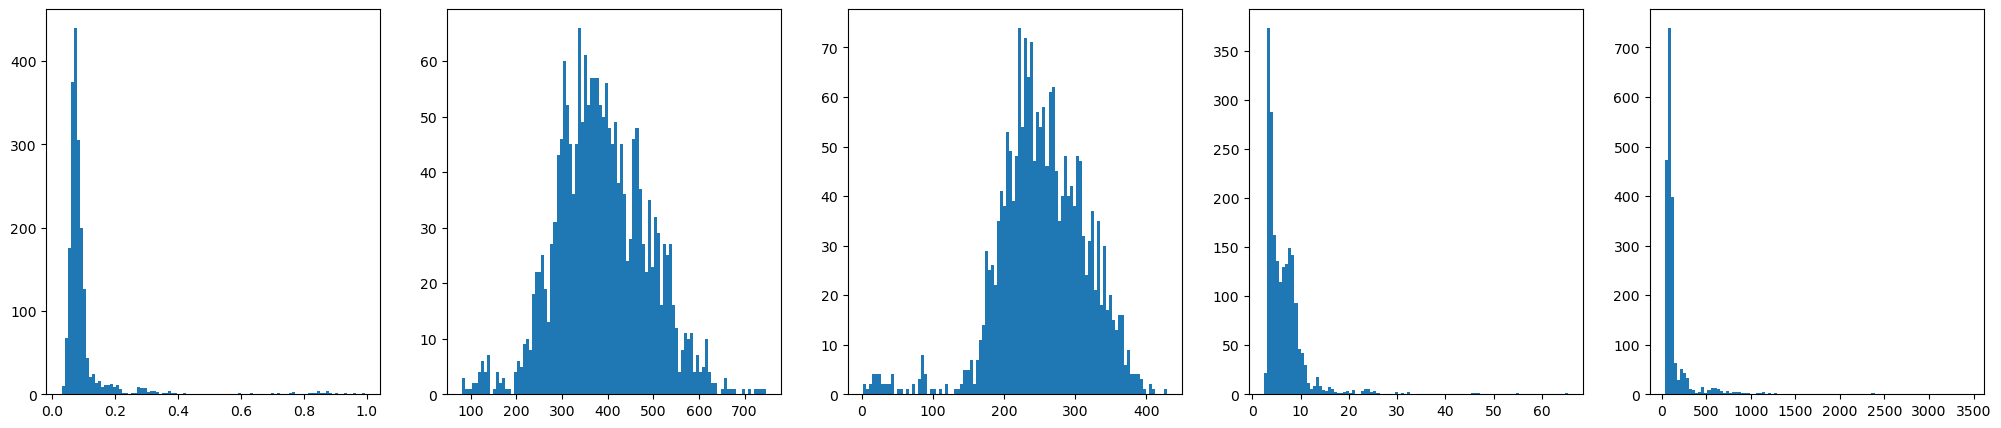

In [3]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

ax[0].hist(foldseek_output['fident'], bins=100)
ax[1].hist(foldseek_output['alnlen'], bins=100)
ax[2].hist(foldseek_output['mismatch'], bins=100)
ax[3].hist(foldseek_output['log_evalue'], bins=100)
ax[4].hist(foldseek_output['bits'], bins=100)

Text(0, 0.5, 'Bits')

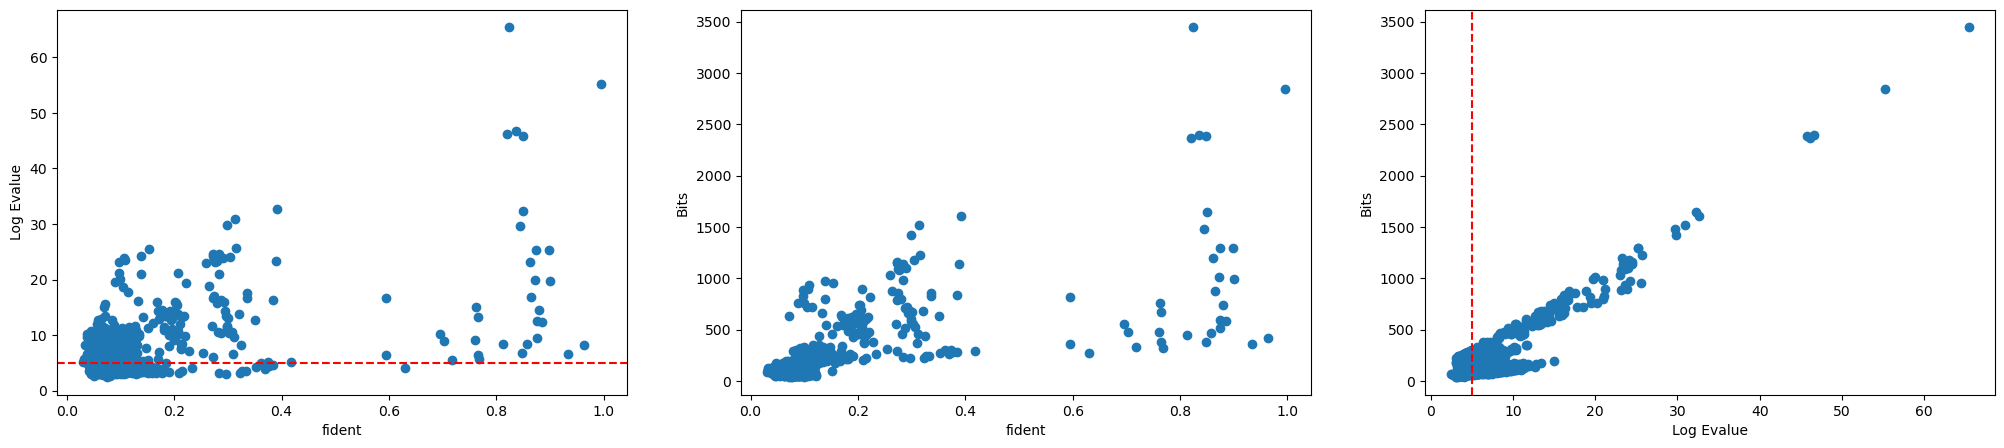

In [4]:
fig, ax = plt.subplots(1,3, figsize=(25,5))

ax[0].scatter(foldseek_output['fident'], foldseek_output['log_evalue'])
ax[1].scatter(foldseek_output['fident'], foldseek_output['bits'])
ax[2].scatter(foldseek_output['log_evalue'], foldseek_output['bits'])

ax[0].axhline(y=-np.log10(1e-5), color='red', linestyle='--')
ax[2].axvline(x=-np.log10(1e-5), color='red', linestyle='--')

## show x & y label for the above scatter plots
ax[0].set_xlabel("fident")
ax[0].set_ylabel("Log Evalue")
ax[1].set_xlabel("fident")
ax[1].set_ylabel("Bits")
ax[2].set_xlabel("Log Evalue")
ax[2].set_ylabel("Bits")

### Using US-align to align the AF-hit structures wrt the query

In [ ]:
## Installed US-align: `conda install -c bioconda usalign`
for i in `ls hit_AF_structures_database/*.pdb`; do /home/kaustubh/miniconda3/envs/MMO/bin/USalign 1MTY_D.pdb $i -outfmt 2 | tail -n 1; done > US_align_AF_hits_wrt_1mty.tsv
mkdir ./hit_AF_structures_database/US-align
mv US_align_AF_hits_wrt_1mty.tsv ./hit_AF_structures_database/US-align/
sed -i "s/hit_AF_structures_database\///g" US_align_AF_hits_wrt_1mty.tsv

In [5]:
usalign_df = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/All_structure_comparison/US-align/US_align_AF_hits_wrt_1mty.tsv", header=None, names=["PDBchain1", "PDBchain2", "TM1", "TM2", "RMSD", "ID1", "ID2", "IDali", "L1", "L2", "Lali"], sep="\t")

usalign_df['PDBchain1'] = usalign_df['PDBchain1'].str.replace(".pdb:D", "")
usalign_df['PDBchain2'] = usalign_df['PDBchain2'].str.replace(".pdb:A", "")
usalign_df

,PDBchain1,PDBchain2,TM1,TM2,RMSD,ID1,ID2,IDali,L1,L2,Lali
0,1MTY_D,AF-A0A010ZTK9-F1-model_v4,0.2597,0.2199,7.71,0.023,0.019,0.054,512,642,223
1,1MTY_D,AF-A0A011N6S4-F1-model_v4,0.2826,0.2854,7.05,0.023,0.024,0.052,512,505,229
2,1MTY_D,AF-A0A013RIH8-F1-model_v4,0.5034,0.7610,2.94,0.061,0.095,0.108,512,326,286
3,1MTY_D,AF-A0A015RXU5-F1-model_v4,0.2323,0.2742,7.85,0.016,0.020,0.039,512,404,203
4,1MTY_D,AF-A0A016U0Q7-F1-model_v4,0.2345,0.3245,6.69,0.014,0.021,0.038,512,329,183
...,...,...,...,...,...,...,...,...,...,...,...
1970,1MTY_D,AF-X1XAV0-F1-model_v4,0.2686,0.2867,7.16,0.023,0.026,0.055,512,469,217
1971,1MTY_D,AF-X6JZ06-F1-model_v4,0.2205,0.3086,6.95,0.029,0.046,0.087,512,327,173
1972,1MTY_D,AF-X7UM80-F1-model_v4,0.3862,0.7415,3.05,0.039,0.081,0.090,512,248,221
1973,1MTY_D,AF-X8HT36-F1-model_v4,0.2963,0.2851,7.02,0.039,0.037,0.087,512,538,231


In [6]:
processed_df = pd.merge(foldseek_output, usalign_df, left_on=["query", "target"], right_on=["PDBchain1", "PDBchain2"])
processed_df.drop(columns=["PDBchain1", "PDBchain2"], inplace=True)
processed_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,...,log_evalue,TM1,TM2,RMSD,ID1,ID2,IDali,L1,L2,Lali
0,1MTY_D,AF-A0A4R8HNW2-F1-model_v4,0.824,512,90,0,1,512,15,526,...,65.403953,0.9942,0.9678,0.80,0.824,0.802,0.824,512,526,512
1,1MTY_D,AF-Q7R763-F1-model_v4,0.995,416,2,0,91,506,2,417,...,55.249029,0.8170,0.9980,0.34,0.809,0.988,0.988,512,419,419
2,1MTY_D,AF-Q842H7-F1-model_v4,0.836,397,65,0,53,449,2,398,...,46.642828,0.7756,0.9972,0.40,0.648,0.834,0.834,512,398,398
3,1MTY_D,AF-A0A395D1H6-F1-model_v4,0.849,378,57,0,1,378,15,392,...,45.741123,0.7380,0.9583,0.85,0.629,0.817,0.847,512,394,380
4,1MTY_D,AF-Q8KM74-F1-model_v4,0.820,400,72,0,48,447,1,400,...,46.133122,0.7790,0.9965,0.44,0.641,0.820,0.820,512,400,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,1MTY_D,AF-A0A355RYZ4-F1-model_v4,0.066,435,277,18,26,437,1,329,...,4.611721,0.2435,0.3236,6.05,0.018,0.025,0.052,512,359,173
1971,1MTY_D,AF-A0A838DB80-F1-model_v4,0.081,370,230,13,48,369,1,308,...,2.670806,0.2314,0.3049,6.16,0.018,0.025,0.053,512,360,169
1972,1MTY_D,AF-A0A3C1NUY1-F1-model_v4,0.064,463,288,21,12,403,12,400,...,3.925549,0.2427,0.2909,6.89,0.025,0.032,0.068,512,402,192
1973,1MTY_D,AF-A0A7S0K516-F1-model_v4,0.044,587,315,18,1,428,23,522,...,3.768785,0.2303,0.2266,6.81,0.016,0.015,0.044,512,523,181


## Reading the output from the Uniprot mappings

In [7]:
uniprot_id_map = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_uniprot_info/idmapping_2025_04_15.tsv", sep="\t")
uniprot_id_map

,From,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Taxonomic lineage
0,A0A4R8HNW2,A0A4R8HNW2,unreviewed,A0A4R8HNW2_9HYPH,Soluble methane monooxygenase hydroxylase comp...,EDE12_10270,Methylosinus sp. sav-2,526.0,"cellular organisms (no rank), Bacteria (superk..."
1,Q7R763,Q7R763,unreviewed,Q7R763_PLAYO,Uncharacterized protein,PY07725,Plasmodium yoelii yoelii,419.0,"cellular organisms (no rank), Eukaryota (super..."
2,Q842H7,Q842H7,unreviewed,Q842H7_METTU,Soluble methane monooxygenase component A alph...,mmoX,Methylocella tundrae,398.0,"cellular organisms (no rank), Bacteria (superk..."
3,A0A395D1H6,A0A395D1H6,unreviewed,A0A395D1H6_9HYPH,Methane monooxygenase,C3F11_02095,Methylocystaceae bacterium,394.0,"cellular organisms (no rank), Bacteria (superk..."
4,Q8KM74,Q8KM74,unreviewed,Q8KM74_METTR,Soluble methane monooxygenase component A alph...,mmoX,Methylosinus trichosporium,400.0,"cellular organisms (no rank), Bacteria (superk..."
...,...,...,...,...,...,...,...,...,...
1970,A0A355RYZ4,A0A355RYZ4,unreviewed,A0A355RYZ4_9CLOT,Glycoside hydrolase,DD429_06405,Clostridiaceae bacterium,359.0,"cellular organisms (no rank), Bacteria (superk..."
1971,A0A838DB80,A0A838DB80,unreviewed,A0A838DB80_9BACT,PAS domain S-box protein,H0W20_05465,Chthoniobacterales bacterium,360.0,"cellular organisms (no rank), Bacteria (superk..."
1972,A0A3C1NUY1,A0A3C1NUY1,NaN,A0A3C1NUY1_9GAMM,deleted,NaN,NaN,NaN,NaN
1973,A0A7S0K516,A0A7S0K516,unreviewed,A0A7S0K516_CAFRO,Dynein heavy chain ATP-binding dynein motor re...,CROE0942_LOCUS13472,Cafeteria roenbergensis (Marine flagellate),523.0,"cellular organisms (no rank), Eukaryota (super..."


In [8]:
processed_df = pd.merge(processed_df, uniprot_id_map, left_on=["uniprot_id"], right_on=["Entry"])
processed_df.drop(columns=["Entry", "From"], inplace=True)
processed_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,...,L1,L2,Lali,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Taxonomic lineage
0,1MTY_D,AF-A0A4R8HNW2-F1-model_v4,0.824,512,90,0,1,512,15,526,...,512,526,512,unreviewed,A0A4R8HNW2_9HYPH,Soluble methane monooxygenase hydroxylase comp...,EDE12_10270,Methylosinus sp. sav-2,526.0,"cellular organisms (no rank), Bacteria (superk..."
1,1MTY_D,AF-Q7R763-F1-model_v4,0.995,416,2,0,91,506,2,417,...,512,419,419,unreviewed,Q7R763_PLAYO,Uncharacterized protein,PY07725,Plasmodium yoelii yoelii,419.0,"cellular organisms (no rank), Eukaryota (super..."
2,1MTY_D,AF-Q842H7-F1-model_v4,0.836,397,65,0,53,449,2,398,...,512,398,398,unreviewed,Q842H7_METTU,Soluble methane monooxygenase component A alph...,mmoX,Methylocella tundrae,398.0,"cellular organisms (no rank), Bacteria (superk..."
3,1MTY_D,AF-A0A395D1H6-F1-model_v4,0.849,378,57,0,1,378,15,392,...,512,394,380,unreviewed,A0A395D1H6_9HYPH,Methane monooxygenase,C3F11_02095,Methylocystaceae bacterium,394.0,"cellular organisms (no rank), Bacteria (superk..."
4,1MTY_D,AF-Q8KM74-F1-model_v4,0.820,400,72,0,48,447,1,400,...,512,400,400,unreviewed,Q8KM74_METTR,Soluble methane monooxygenase component A alph...,mmoX,Methylosinus trichosporium,400.0,"cellular organisms (no rank), Bacteria (superk..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970,1MTY_D,AF-A0A355RYZ4-F1-model_v4,0.066,435,277,18,26,437,1,329,...,512,359,173,unreviewed,A0A355RYZ4_9CLOT,Glycoside hydrolase,DD429_06405,Clostridiaceae bacterium,359.0,"cellular organisms (no rank), Bacteria (superk..."
1971,1MTY_D,AF-A0A838DB80-F1-model_v4,0.081,370,230,13,48,369,1,308,...,512,360,169,unreviewed,A0A838DB80_9BACT,PAS domain S-box protein,H0W20_05465,Chthoniobacterales bacterium,360.0,"cellular organisms (no rank), Bacteria (superk..."
1972,1MTY_D,AF-A0A3C1NUY1-F1-model_v4,0.064,463,288,21,12,403,12,400,...,512,402,192,NaN,A0A3C1NUY1_9GAMM,deleted,NaN,NaN,NaN,NaN
1973,1MTY_D,AF-A0A7S0K516-F1-model_v4,0.044,587,315,18,1,428,23,522,...,512,523,181,unreviewed,A0A7S0K516_CAFRO,Dynein heavy chain ATP-binding dynein motor re...,CROE0942_LOCUS13472,Cafeteria roenbergensis (Marine flagellate),523.0,"cellular organisms (no rank), Eukaryota (super..."


### Cleaning the database for entries with missing names and unassigned labels

In [9]:
processed_df = processed_df.query('~`Protein names`.isin(["Uncharacterized protein", "deleted"])')
processed_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,...,L1,L2,Lali,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Taxonomic lineage
0,1MTY_D,AF-A0A4R8HNW2-F1-model_v4,0.824,512,90,0,1,512,15,526,...,512,526,512,unreviewed,A0A4R8HNW2_9HYPH,Soluble methane monooxygenase hydroxylase comp...,EDE12_10270,Methylosinus sp. sav-2,526.0,"cellular organisms (no rank), Bacteria (superk..."
2,1MTY_D,AF-Q842H7-F1-model_v4,0.836,397,65,0,53,449,2,398,...,512,398,398,unreviewed,Q842H7_METTU,Soluble methane monooxygenase component A alph...,mmoX,Methylocella tundrae,398.0,"cellular organisms (no rank), Bacteria (superk..."
3,1MTY_D,AF-A0A395D1H6-F1-model_v4,0.849,378,57,0,1,378,15,392,...,512,394,380,unreviewed,A0A395D1H6_9HYPH,Methane monooxygenase,C3F11_02095,Methylocystaceae bacterium,394.0,"cellular organisms (no rank), Bacteria (superk..."
4,1MTY_D,AF-Q8KM74-F1-model_v4,0.820,400,72,0,48,447,1,400,...,512,400,400,unreviewed,Q8KM74_METTR,Soluble methane monooxygenase component A alph...,mmoX,Methylosinus trichosporium,400.0,"cellular organisms (no rank), Bacteria (superk..."
7,1MTY_D,AF-A0A3N0GIB9-F1-model_v4,0.314,508,333,8,6,508,1,498,...,512,501,498,unreviewed,A0A3N0GIB9_9ACTN,propane 2-monooxygenase (EC 1.14.13.227),EFL26_20625,Nocardioides pocheonensis,501.0,"cellular organisms (no rank), Bacteria (superk..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,1MTY_D,AF-A0A538P421-F1-model_v4,0.066,301,177,10,53,310,2,241,...,512,259,136,unreviewed,A0A538P421_UNCVE,Cation transporter,E6L09_11820,Verrucomicrobiota bacterium,259.0,"cellular organisms (no rank), Bacteria (superk..."
1970,1MTY_D,AF-A0A355RYZ4-F1-model_v4,0.066,435,277,18,26,437,1,329,...,512,359,173,unreviewed,A0A355RYZ4_9CLOT,Glycoside hydrolase,DD429_06405,Clostridiaceae bacterium,359.0,"cellular organisms (no rank), Bacteria (superk..."
1971,1MTY_D,AF-A0A838DB80-F1-model_v4,0.081,370,230,13,48,369,1,308,...,512,360,169,unreviewed,A0A838DB80_9BACT,PAS domain S-box protein,H0W20_05465,Chthoniobacterales bacterium,360.0,"cellular organisms (no rank), Bacteria (superk..."
1973,1MTY_D,AF-A0A7S0K516-F1-model_v4,0.044,587,315,18,1,428,23,522,...,512,523,181,unreviewed,A0A7S0K516_CAFRO,Dynein heavy chain ATP-binding dynein motor re...,CROE0942_LOCUS13472,Cafeteria roenbergensis (Marine flagellate),523.0,"cellular organisms (no rank), Eukaryota (super..."


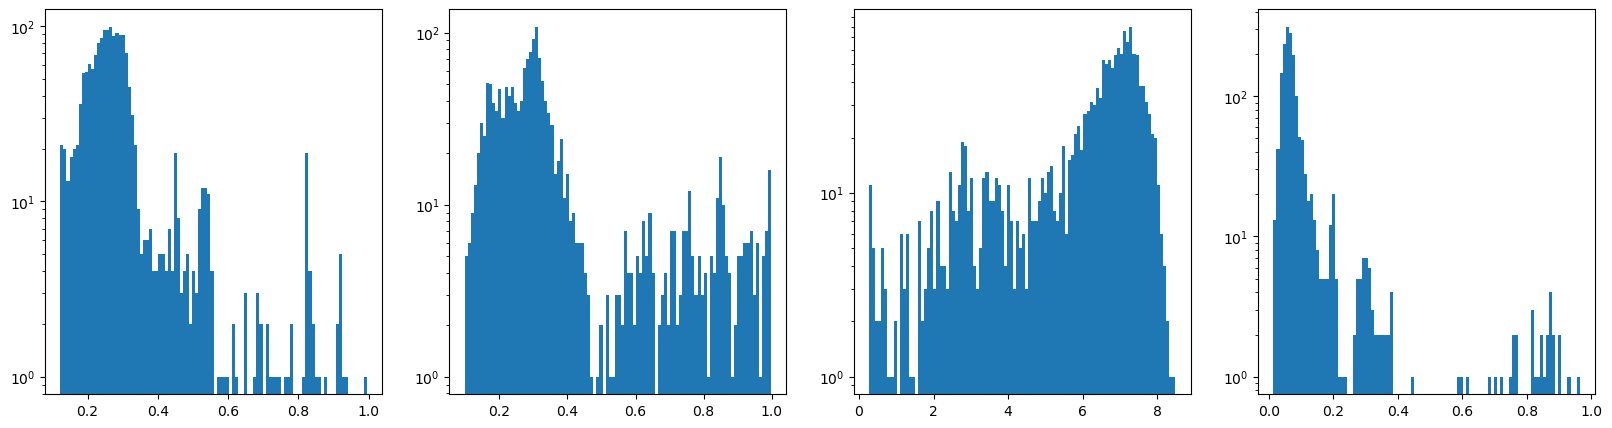

In [10]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

ax[0].hist(processed_df['TM1'], bins=100)
ax[0].set_yscale('log')
ax[1].hist(processed_df['TM2'], bins=100)
ax[1].set_yscale('log')
ax[2].hist(processed_df['RMSD'], bins=100)
ax[2].set_yscale('log')
ax[3].hist(processed_df['IDali'], bins=100)
ax[3].set_yscale('log')
# ax[4].hist(foldseek_output['bits'], bins=100)

### TM-align website mentions that a score below 0.17 corresponds to a randomly chosen unrelated protein (based on PDB structures)

### Paper: `https://pmc.ncbi.nlm.nih.gov/articles/PMC2913670/` suggests that a TM-score of `0.5` is a good cutoff for considering that the two proteins have same/similar fold/Topology

Text(0, 0.5, 'IDali')

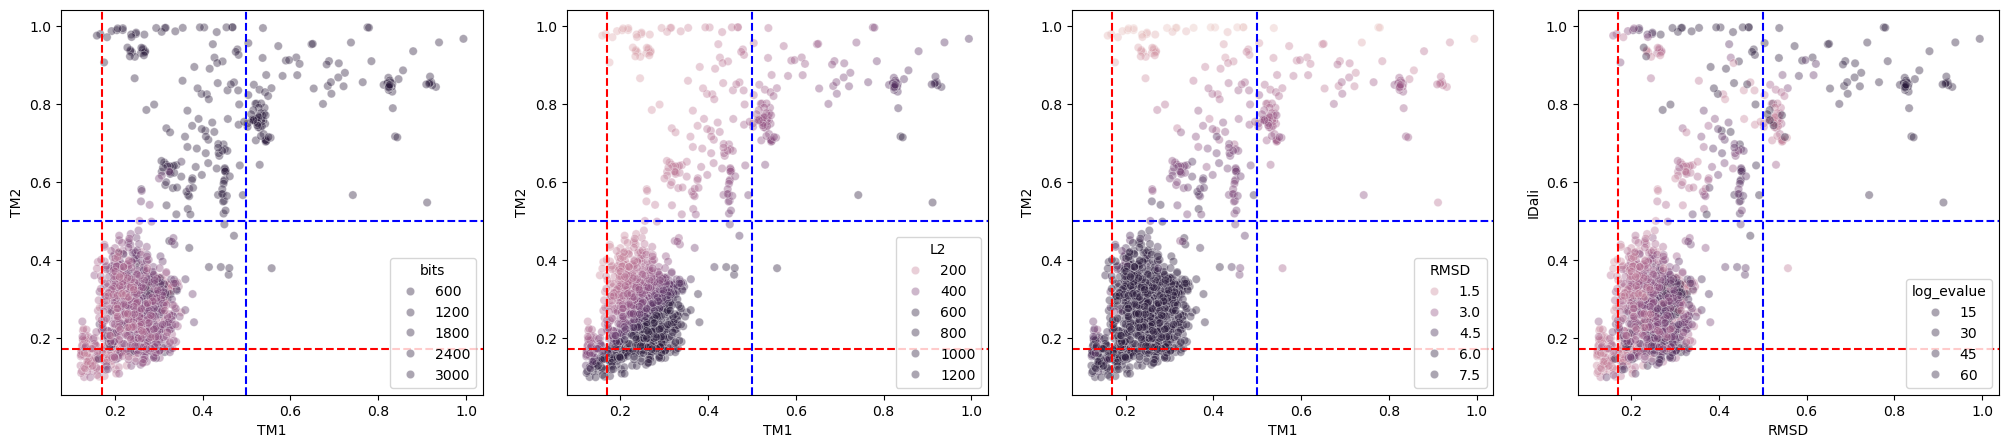

In [11]:
fig, ax = plt.subplots(1,4, figsize=(25,5))

sns.scatterplot(data=processed_df, x='TM1', y='TM2', hue='bits', hue_norm=(0,150), alpha=0.4, ax=ax[0])
sns.scatterplot(data=processed_df, x='TM1', y='TM2', hue='L2', hue_norm=(0,600), alpha=0.4, ax=ax[1])
sns.scatterplot(data=processed_df, x='TM1', y='TM2', hue='RMSD', alpha=0.4, hue_norm=(0,5), ax=ax[2])
sns.scatterplot(data=processed_df, x='TM1', y='TM2', ax=ax[3], hue='log_evalue', hue_norm=(0,10), alpha=0.4)

ax[0].axhline(y=0.17, color='red', linestyle='--')
ax[0].axvline(x=0.17, color='red', linestyle='--')
ax[0].axvline(x=0.5, color='blue', linestyle='--')
ax[0].axhline(y=0.5, color='blue', linestyle='--')
ax[1].axhline(y=0.17, color='red', linestyle='--')
ax[1].axvline(x=0.17, color='red', linestyle='--')
ax[1].axvline(x=0.5, color='blue', linestyle='--')
ax[1].axhline(y=0.5, color='blue', linestyle='--')
ax[2].axvline(x=0.17, color='red', linestyle='--')
ax[2].axhline(y=0.17, color='red', linestyle='--')
ax[2].axvline(x=0.5, color='blue', linestyle='--')
ax[2].axhline(y=0.5, color='blue', linestyle='--')
ax[3].axvline(x=0.17, color='red', linestyle='--')
ax[3].axhline(y=0.17, color='red', linestyle='--')
ax[3].axvline(x=0.5, color='blue', linestyle='--')
ax[3].axhline(y=0.5, color='blue', linestyle='--')

# show x & y label for the above scatter plots
ax[0].set_xlabel("TM1")
ax[0].set_ylabel("TM2")
ax[1].set_xlabel("TM1")
ax[1].set_ylabel("TM2")
ax[2].set_xlabel("TM1")
ax[2].set_ylabel("TM2")
ax[3].set_xlabel("RMSD")
ax[3].set_ylabel("IDali")

## <span style="color:orange"> Need a strategy for how to select the hits out of this mess!!

### Let's just follow the paper -- we essentially only need and care for proteins that have the same fold/topology

### <span style="color:#F0F0C9"> **----------------------2025-04-27----------------------** </span>

## Setting the TM-score hard-limit of `0.5`

In [12]:
filtered_hits_df = processed_df.query('TM1 >= 0.5 or TM2 >= 0.5')
filtered_hits_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,...,L1,L2,Lali,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Taxonomic lineage
0,1MTY_D,AF-A0A4R8HNW2-F1-model_v4,0.824,512,90,0,1,512,15,526,...,512,526,512,unreviewed,A0A4R8HNW2_9HYPH,Soluble methane monooxygenase hydroxylase comp...,EDE12_10270,Methylosinus sp. sav-2,526.0,"cellular organisms (no rank), Bacteria (superk..."
2,1MTY_D,AF-Q842H7-F1-model_v4,0.836,397,65,0,53,449,2,398,...,512,398,398,unreviewed,Q842H7_METTU,Soluble methane monooxygenase component A alph...,mmoX,Methylocella tundrae,398.0,"cellular organisms (no rank), Bacteria (superk..."
3,1MTY_D,AF-A0A395D1H6-F1-model_v4,0.849,378,57,0,1,378,15,392,...,512,394,380,unreviewed,A0A395D1H6_9HYPH,Methane monooxygenase,C3F11_02095,Methylocystaceae bacterium,394.0,"cellular organisms (no rank), Bacteria (superk..."
4,1MTY_D,AF-Q8KM74-F1-model_v4,0.820,400,72,0,48,447,1,400,...,512,400,400,unreviewed,Q8KM74_METTR,Soluble methane monooxygenase component A alph...,mmoX,Methylosinus trichosporium,400.0,"cellular organisms (no rank), Bacteria (superk..."
7,1MTY_D,AF-A0A3N0GIB9-F1-model_v4,0.314,508,333,8,6,508,1,498,...,512,501,498,unreviewed,A0A3N0GIB9_9ACTN,propane 2-monooxygenase (EC 1.14.13.227),EFL26_20625,Nocardioides pocheonensis,501.0,"cellular organisms (no rank), Bacteria (superk..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1MTY_D,AF-A0A1M5GG32-F1-model_v4,0.095,324,241,15,1,286,9,318,...,512,319,201,unreviewed,A0A1M5GG32_9BACT,DUF3050 domain-containing protein,SAMN05444008_11656,Cnuella takakiae,319.0,"cellular organisms (no rank), Bacteria (superk..."
992,1MTY_D,AF-A0A1F4X6N4-F1-model_v4,0.065,228,191,7,53,273,3,215,...,512,221,186,unreviewed,A0A1F4X6N4_UNCZI,Aminopyrimidine aminohydrolase (EC 3.5.99.2),A2145_01260,candidate division Zixibacteria bacterium RBG_...,221.0,"cellular organisms (no rank), Bacteria (superk..."
997,1MTY_D,AF-A0A5J4Z166-F1-model_v4,0.064,233,178,8,59,272,3,214,...,512,215,178,unreviewed,A0A5J4Z166_PORPP,Bifunctional TENA-E protein,FVE85_0383,Porphyridium purpureum (Red alga) (Porphyridiu...,215.0,"cellular organisms (no rank), Eukaryota (super..."
1266,1MTY_D,AF-A0A345JSP8-F1-model_v4,0.049,203,171,6,53,239,3,199,...,512,200,170,unreviewed,A0A345JSP8_9GAMM,PQ-loop repeat-containing protein,CGC43_07000,Francisella opportunistica,200.0,"cellular organisms (no rank), Bacteria (superk..."


### Leaves a total of 272 structural hits

(0.0, 1.028545)

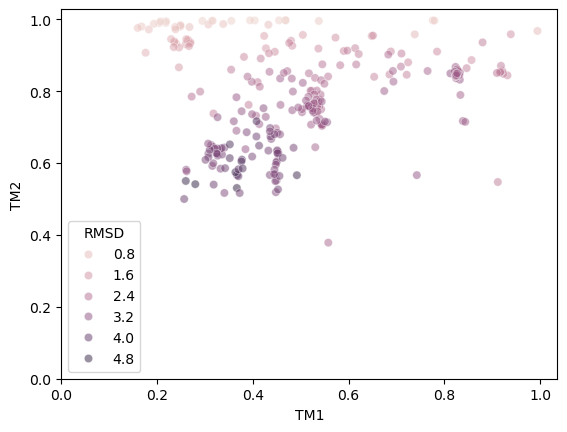

In [13]:
sns.scatterplot(data=filtered_hits_df, x='TM1', y='TM2', hue='RMSD', alpha=0.5)
plt.xlim(0,)
plt.ylim(0,)

In [14]:
filtered_hits_df[['target']].to_csv("/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/TM_score_above_5_structural_comparison/filtered_hits_TM_score_above_5.tsv", index=False, header=False)

### Analysis of the filtered hits protein names

In [15]:
filtered_hits_df['Protein names'].unique().tolist()

['Soluble methane monooxygenase hydroxylase component alpha subunit apoprotein',
 'Soluble methane monooxygenase component A alpha subunit',
 'Methane monooxygenase',
 'propane 2-monooxygenase (EC 1.14.13.227)',
 'Soluble methane monooxygenase',
 'Soluble methane monooxygenase subunit A',
 'Methane monooxygenase (EC 1.14.13.25)',
 'Methane/phenol/toluene hydroxylase',
 'Monooxygenase',
 'Soluble di-iron monooxygenase alpha subunit',
 'Soluble methane monooxygenase alpha subunit',
 'HpdC',
 'YHS domain-containing protein',
 'Toluene monooxygenase',
 'Phenol 2-monooxygenase',
 'Toluene-4-monooxygenase system protein A (EC 1.14.13.-)',
 'Methane/phenol/toluene hydroxylase:YHS',
 'Toluene o-xylene monooxygenase component',
 'Toluene-4-monooxygenase system protein A (Belongs to CMGI-2) (EC 1.14.13.25)',
 'Toluene monooxygenase system protein A',
 'Phenol hydroxylase alpha subunit',
 'Phenol hydroxylase, P3 oxygenase component DmpN (EC 1.14.13.7)',
 'Methane monooxygenase subunit A alpha',
 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92],
 [Text(0, 0, 'Soluble methane monooxygenase hydroxylase component alpha subunit apoprotein'),
  Text(1, 0, 'Soluble methane monooxygenase component A alpha subunit'),
  Text(2, 0, 'Methane monooxygenase'),
  Text(3, 0, 'propane 2-monooxygenase (EC 1.14.13.227)'),
  Text(4, 0, 'Soluble methane monooxygenase'),
  Text(5, 0, 'Soluble methane monooxygenase subunit A'),
  Text(6, 0, 'Methane monooxygenase (EC 1.14.13.25)'),
  Text(7, 0, 'Methane/phenol

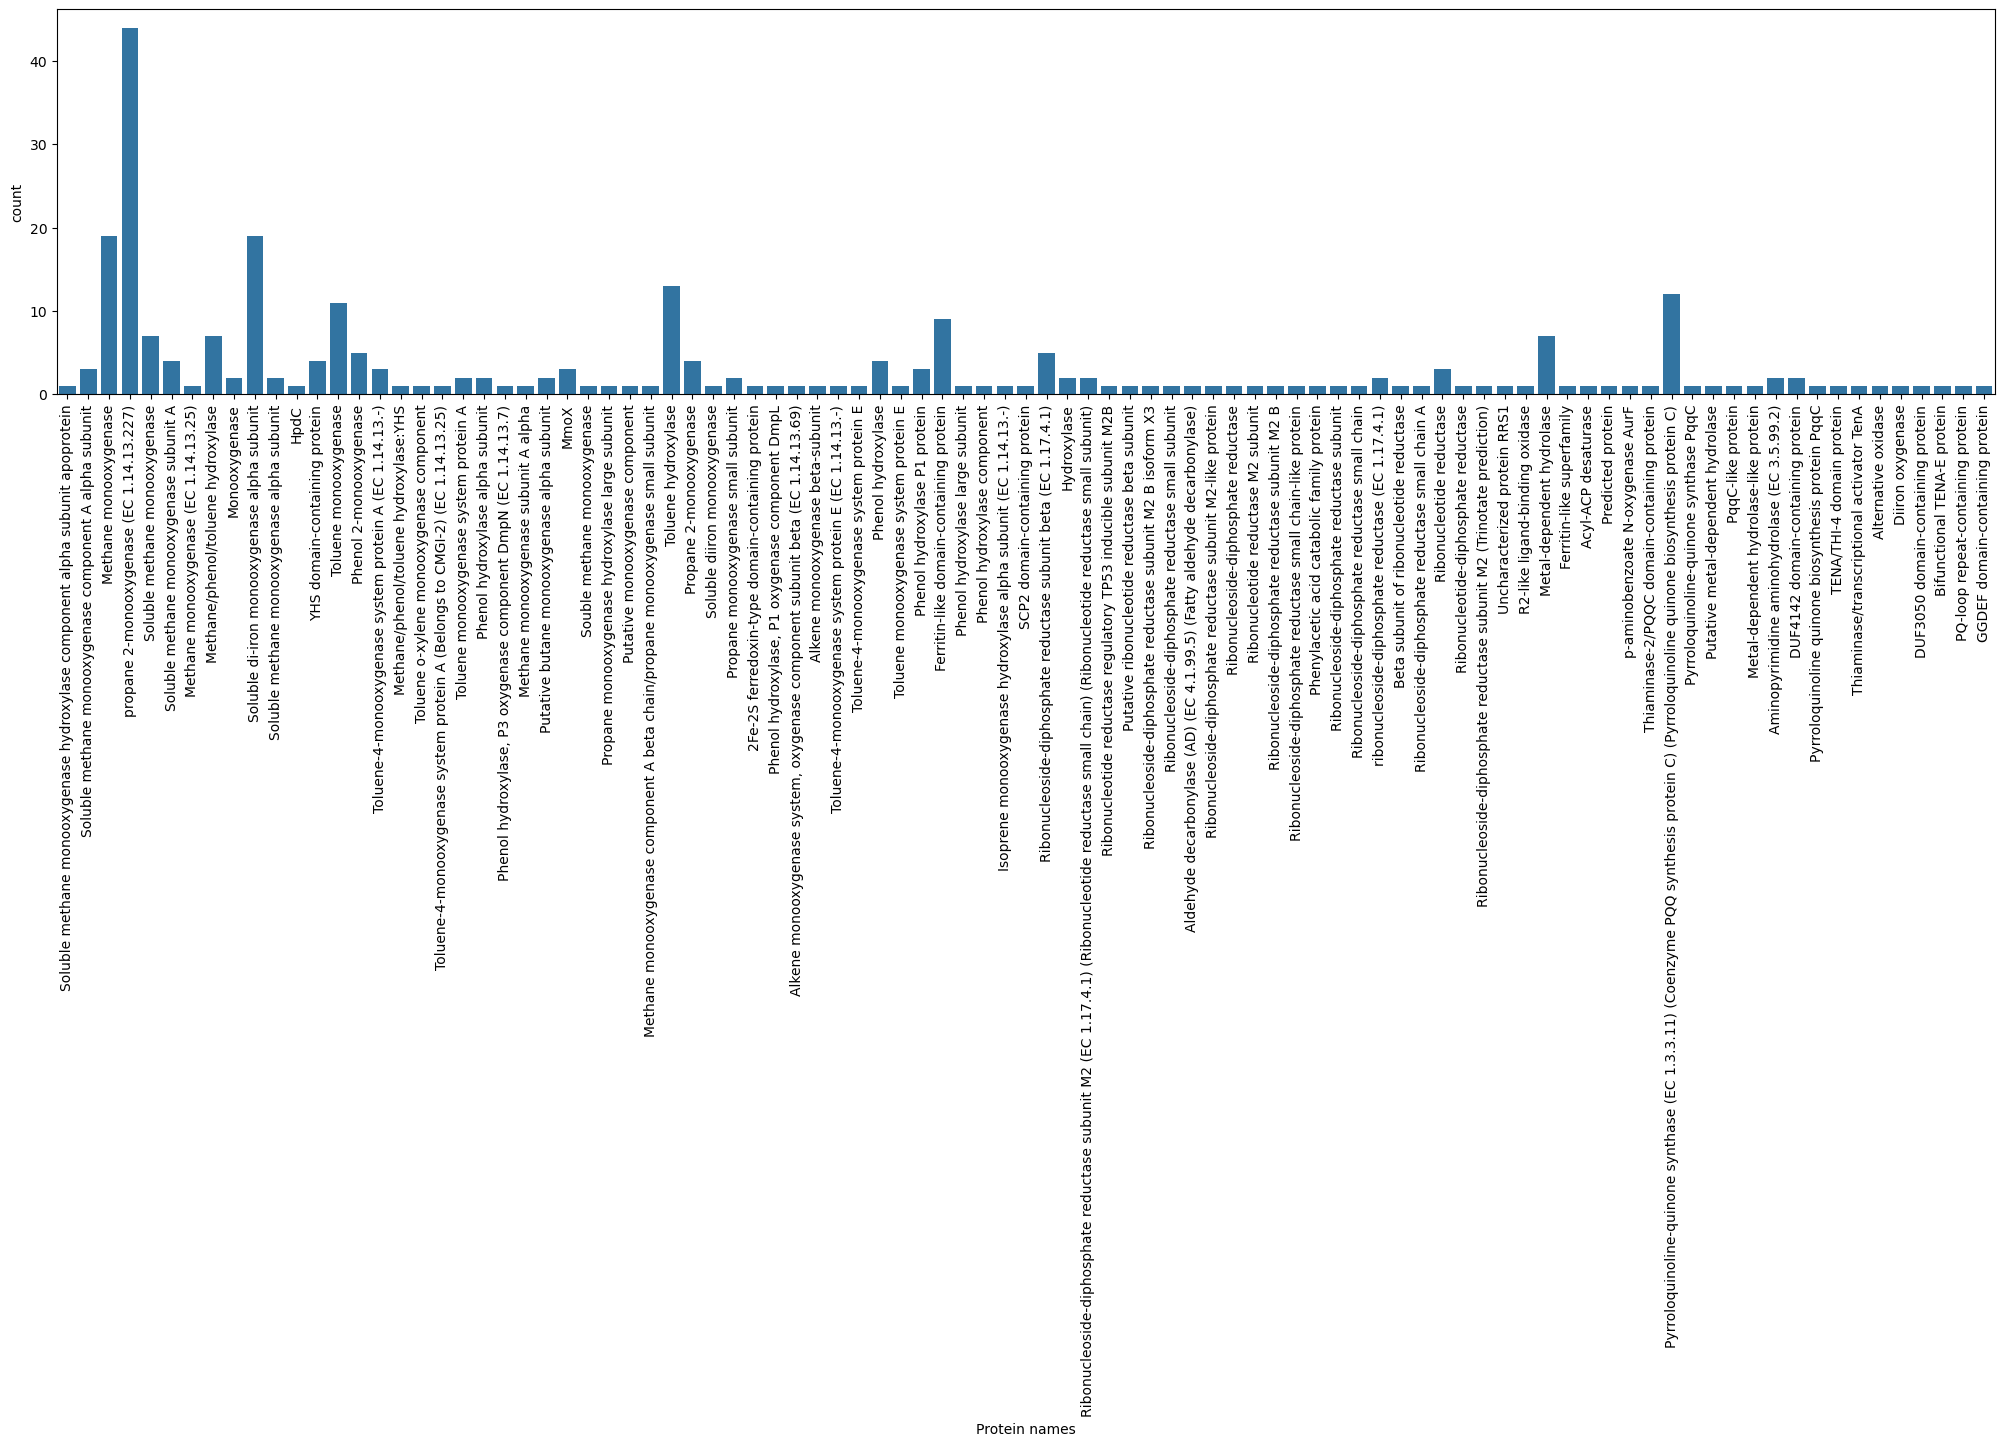

In [16]:
plt.figure(figsize=(25,5))
sns.countplot(data=filtered_hits_df, x='Protein names')
plt.xticks(rotation=90)

### Manually compiled these protein names together into specific groups

In [17]:
Methane_monooxygenase = [
    'Soluble methane monooxygenase hydroxylase component alpha subunit apoprotein',
    'Soluble methane monooxygenase component A alpha subunit',
    'Methane monooxygenase',
    'Soluble methane monooxygenase',
    'Soluble methane monooxygenase subunit A',
    'Methane monooxygenase (EC 1.14.13.25)',
    'Soluble di-iron monooxygenase alpha subunit', 
    'Soluble methane monooxygenase alpha subunit',
    'Methane monooxygenase subunit A alpha',
    'Souble methane monooxygenase',
    'Methane monooxygenase component A beta chain/propane monooxygenase small subunit',
    'MmoX'
]
Propane_monooxygenase = [
    'propane 2-monooxygenase (EC 1.14.13.227)',
    'Propane monooxygenase hydroxylase large subunit',
    'Propane 2-monooxygenase',
    'Propane monooxygenase small subunit'
]
Toluene_monooxygenase = [
    'Toluene monooxygenase',
    'Toluene o-xylene monooxygenase component',
    'Toluene-4-monooxygenase system protein A (Belongs to CMGI-2) (EC 1.14.13.25)',
    'Toluene monooxygenase system protein A',
    'Toluene-4-monooxygenase system protein E (EC 1.14.13.-)',
    'Toluene-4-monooxygenase system protein E',
    'Toluene monooxygenase system protein E',
    'Toluene-4-monooxygenase system protein A (EC 1.14.13.-)'
]
Other_monooxygenase = [
    'Monooxygenase',
    'Phenol 2-monooxygenase',
    'Putative butane monooxygenase alpha subunit',
    'Putative monooxygenase component',
    'Soluble diiron monooxygenase',
    'Alkene monooxygenase system, oxygenase component subunit beta (EC 1.14.13.69)',
    'Alkene monooxygenase beta-subunit',
    'Diiron oxygenase'
]
Hydroxylase = [
    'Methane/phenol/toluene hydroxylase',
    'Methane/phenol/toluene hydroxylase:YHS',
    'Phenol hydroxylase alpha subunit',
    'Phenol hydroxylase, P3 oxygenase component DmpN (EC 1.14.13.7)',
    'Toluene hydroxylase',
    'Phenol hydroxylase, P1 oxygenase component DmpL',
    'Phenol hydroxylase',
    'Phenol hydroxylase P1 protein',
    'Phenol hydroxylase large subunit',
    'Phenol hydroxylase component',
    'Hydroxylase',
    'Isoprene monooxygenase hydroxylase alpha subunit (EC 1.14.13.-)'
]
Pyrroloquinoline_quinone_synthase = [
    'Pyrroloquinoline-quinone synthase (EC 1.3.3.11) (Coenzyme PQQ synthesis protein C) (Pyrroloquinoline quinone biosynthesis protein C)',
    'Pyrroloquinoline-quinone synthase PqqC',
    'Pyrroloquinoline quinone biosynthesis protein PqqC',
    'Thiaminase-2/PQQC domain-containing protein',
    'PqqC-like protein'
]
ribonucleoside_reductase = [
    'Ribonucleoside-diphosphate reductase subunit beta (EC 1.17.4.1)',
    'Ribonucleoside-diphosphate reductase subunit M2 (EC 1.17.4.1) (Ribonucleotide reductase small chain) (Ribonucleotide reductase small subunit)',
    'Ribonucleotide reductase regulatory TP53 inducible subunit M2B',
    'Putative ribonucleotide reductase beta subunit',
    'Ribonucleoside-diphosphate reductase subunit M2 B isoform X3',
    'Ribonucleoside-diphosphate reductase small subunit',
    'Ribonucleoside-diphosphate reductase subunit M2-like protein',
    'Ribonucleoside-diphosphate reductase',
    'Ribonucleotide reductase M2 subunit',
    'Ribonucleoside-diphosphate reductase subunit M2 B',
    'Ribonucleoside-diphosphate reductase small chain-like protein',
    'Ribonucleoside-diphosphate reductase subunit',
    'Ribonucleoside-diphosphate reductase small chain',
    'ribonucleoside-diphosphate reductase (EC 1.17.4.1)',
    'Beta subunit of ribonucleotide reductase',
    'Ribonucleoside-diphosphate reductase small chain A',
    'Ribonucleotide reductase',
    'Ribonucleotide-diphosphate reductase',
    'Ribonucleoside-diphosphate reductase subunit M2 (Trinotate prediction)',
]
Different_hydrolases = [
    'Metal-dependent hydrolase',
    'Putative metal-dependent hydrolase',
    'Metal-dependent hydrolase-like protein',
    'Aminopyrimidine aminohydrolase (EC 3.5.99.2)',
]
Ferritin_like = [
    'Ferritin-like domain-containing protein',
    'Ferritin-like superfamily'
]
Others = [
    '2Fe-2S ferredoxin-type domain-containing protein',
    'HpdC',
    'YHS domain-containing protein',
    'SCP2 domain-containing protein',
    'Aldehyde decarbonylase (AD) (EC 4.1.99.5) (Fatty aldehyde decarbonylase)',
    'Phenylacetic acid catabolic family protein',
    'Uncharacterized protein RRS1',
    'R2-like ligand-binding oxidase',
    'Acyl-ACP desaturase',
    'Predicted protein',
    'p-aminobenzoate N-oxygenase AurF',
    'DUF4142 domain-containing protein',
    'TENA/THI-4 domain protein',
    'Thiaminase/transcriptional activator TenA',
    'Alternative oxidase',
    'DUF3050 domain-containing protein',
    'Bifunctional TENA-E protein',
    'PQ-loop repeat-containing protein',
    'GGDEF domain-containing protein'
]

In [18]:
major_group_names_ids = ["Methane_monooxygenase", "Propane_monooxygenase", "Toluene_monooxygenase", "Monooxygenase", "Hydroxylase", "Pyrroloquinoline_quinone_synthase", "ribonucleoside_reductase", "Different_hydrolases", "Ferritin_like", "Others"]
major_group_names = [Methane_monooxygenase, Propane_monooxygenase, Toluene_monooxygenase, Other_monooxygenase, Hydroxylase, Pyrroloquinoline_quinone_synthase, ribonucleoside_reductase, Different_hydrolases, Ferritin_like, Others]
major_group_dict = {}

for i in range(len(major_group_names)):
    for j in major_group_names[i]:
        major_group_dict[j] = major_group_names_ids[i]

filtered_hits_df['major_group'] = filtered_hits_df['Protein names'].map(major_group_dict)

/tmp/ipykernel_687970/2674423185.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hits_df['major_group'] = filtered_hits_df['Protein names'].map(major_group_dict)


In [19]:
major_group_dict

{'Soluble methane monooxygenase hydroxylase component alpha subunit apoprotein': 'Methane_monooxygenase',
 'Soluble methane monooxygenase component A alpha subunit': 'Methane_monooxygenase',
 'Methane monooxygenase': 'Methane_monooxygenase',
 'Soluble methane monooxygenase': 'Methane_monooxygenase',
 'Soluble methane monooxygenase subunit A': 'Methane_monooxygenase',
 'Methane monooxygenase (EC 1.14.13.25)': 'Methane_monooxygenase',
 'Soluble di-iron monooxygenase alpha subunit': 'Methane_monooxygenase',
 'Soluble methane monooxygenase alpha subunit': 'Methane_monooxygenase',
 'Methane monooxygenase subunit A alpha': 'Methane_monooxygenase',
 'Souble methane monooxygenase': 'Methane_monooxygenase',
 'Methane monooxygenase component A beta chain/propane monooxygenase small subunit': 'Methane_monooxygenase',
 'MmoX': 'Methane_monooxygenase',
 'propane 2-monooxygenase (EC 1.14.13.227)': 'Propane_monooxygenase',
 'Propane monooxygenase hydroxylase large subunit': 'Propane_monooxygenase',
 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Methane_monooxygenase'),
  Text(1, 0, 'Propane_monooxygenase'),
  Text(2, 0, 'Hydroxylase'),
  Text(3, 0, 'Monooxygenase'),
  Text(4, 0, 'Others'),
  Text(5, 0, 'Toluene_monooxygenase'),
  Text(6, 0, 'Ferritin_like'),
  Text(7, 0, 'ribonucleoside_reductase'),
  Text(8, 0, 'Different_hydrolases'),
  Text(9, 0, 'Pyrroloquinoline_quinone_synthase')])

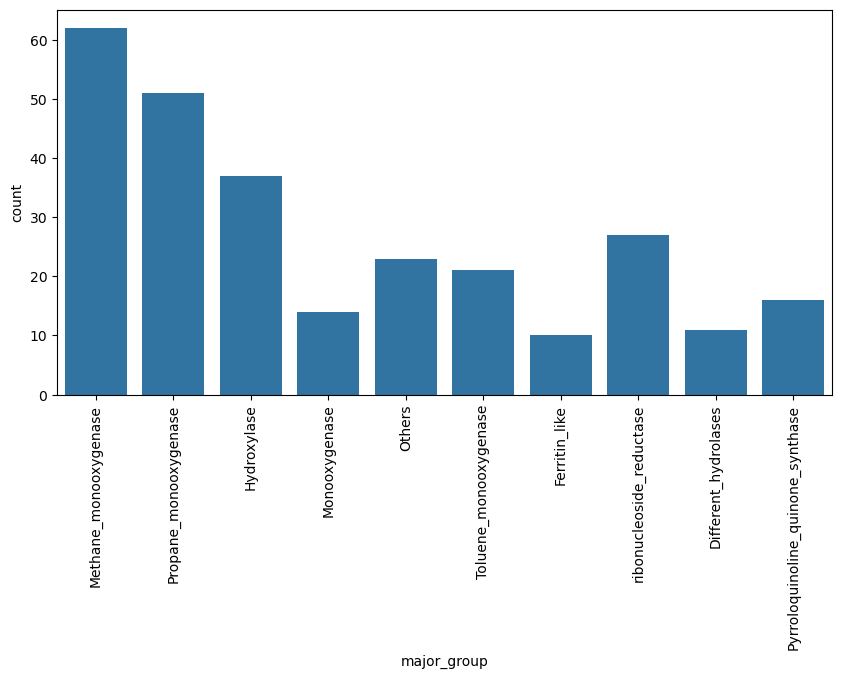

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=filtered_hits_df, x='major_group')
plt.xticks(rotation=90)

(0.0, 1.028545)

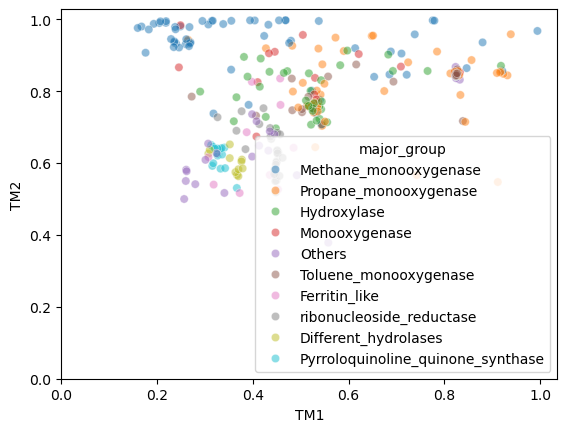

In [21]:
sns.scatterplot(data=filtered_hits_df, x='TM1', y='TM2', hue='major_group', alpha=0.5)
plt.xlim(0,)
plt.ylim(0,)

### Extracting the specific taxonomic information for each entry

In [22]:
def extract_lineage_dict(text):
    matches = re.findall(r'([^,]+?) \(([^)]+)\)', text)
    lineage_dict = {rank: name.strip() for name, rank in matches}
    return lineage_dict

filtered_hits_df['lineage_dict'] = filtered_hits_df['Taxonomic lineage'].apply(lambda x: extract_lineage_dict(x))

filtered_hits_df['superkingdom'] = filtered_hits_df['lineage_dict'].apply(lambda x: x.get('superkingdom', ''))
filtered_hits_df['phylum'] = filtered_hits_df['lineage_dict'].apply(lambda x: x.get('phylum'))
filtered_hits_df['class'] = filtered_hits_df['lineage_dict'].apply(lambda x: x.get('class'))
filtered_hits_df['order'] = filtered_hits_df['lineage_dict'].apply(lambda x: x.get('order'))

/tmp/ipykernel_687970/1253690801.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hits_df['lineage_dict'] = filtered_hits_df['Taxonomic lineage'].apply(lambda x: extract_lineage_dict(x))
/tmp/ipykernel_687970/1253690801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_hits_df['superkingdom'] = filtered_hits_df['lineage_dict'].apply(lambda x: x.get('superkingdom', ''))
/tmp/ipykernel_687970/1253690801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Alphaproteobacteria'),
  Text(1, 0, 'Actinomycetes'),
  Text(2, 0, 'Myxococcia'),
  Text(3, 0, 'Bacilli'),
  Text(4, 0, 'Thermoleophilia'),
  Text(5, 0, 'Betaproteobacteria'),
  Text(6, 0, 'Ktedonobacteria'),
  Text(7, 0, 'Halobacteria'),
  Text(8, 0, 'Gammaproteobacteria'),
  Text(9, 0, 'Epsilonproteobacteria'),
  Text(10, 0, 'Cyanophyceae'),
  Text(11, 0, 'Marchantiopsida'),
  Text(12, 0, 'Thermoprotei'),
  Text(13, 0, 'Chloroflexia'),
  Text(14, 0, 'Mammalia'),
  Text(15, 0, 'Aves'),
  Text(16, 0, 'Lepidosauria'),
  Text(17, 0, 'Insecta'),
  Text(18, 0, 'Amphibia'),
  Text(19, 0, 'Zoopagomycetes'),
  Text(20, 0, 'Arachnida'),
  Text(21, 0, 'Enoplea'),
  Text(22, 0, 'Kinetoplastea'),
  Text(23, 0, 'Glomeromycetes'),
  Text(24, 0, 'Magnoliopsida'),
  Text(25, 0, 'Flavobacteriia')

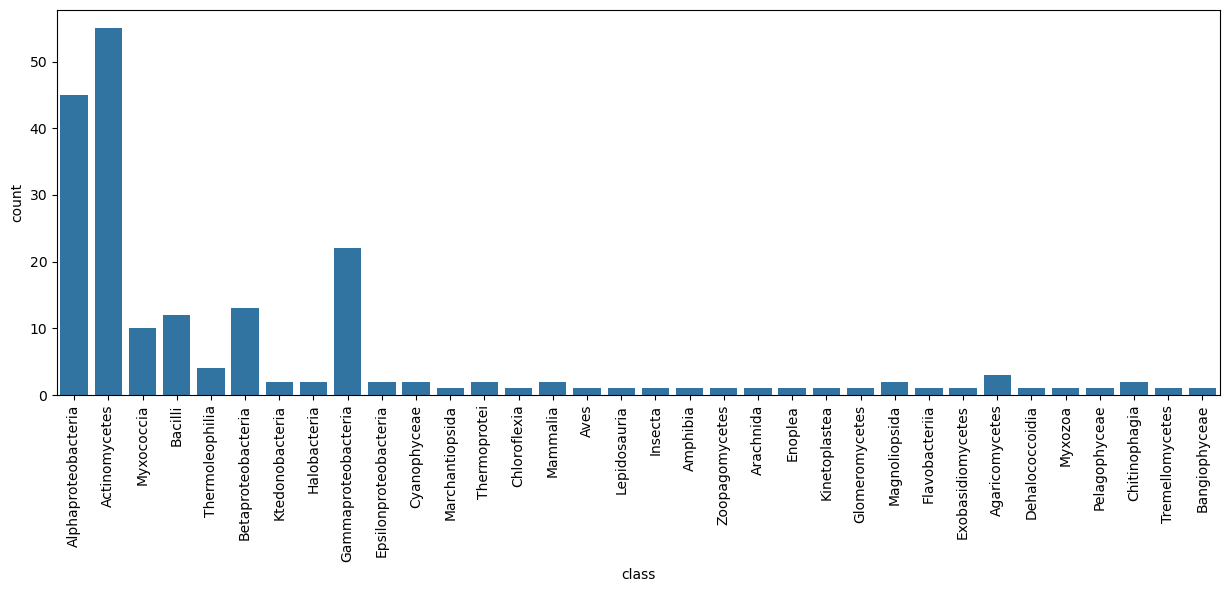

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data=filtered_hits_df, x='class')
plt.xticks(rotation=90)

In [24]:
filtered_hits_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,...,Gene Names,Organism,Length,Taxonomic lineage,major_group,lineage_dict,superkingdom,phylum,class,order
0,1MTY_D,AF-A0A4R8HNW2-F1-model_v4,0.824,512,90,0,1,512,15,526,...,EDE12_10270,Methylosinus sp. sav-2,526.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'unclassified Methylosinus', 'supe...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales
2,1MTY_D,AF-Q842H7-F1-model_v4,0.836,397,65,0,53,449,2,398,...,mmoX,Methylocella tundrae,398.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales
3,1MTY_D,AF-A0A395D1H6-F1-model_v4,0.849,378,57,0,1,378,15,392,...,C3F11_02095,Methylocystaceae bacterium,394.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'unclassified Methylocystaceae', '...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales
4,1MTY_D,AF-Q8KM74-F1-model_v4,0.820,400,72,0,48,447,1,400,...,mmoX,Methylosinus trichosporium,400.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales
7,1MTY_D,AF-A0A3N0GIB9-F1-model_v4,0.314,508,333,8,6,508,1,498,...,EFL26_20625,Nocardioides pocheonensis,501.0,"cellular organisms (no rank), Bacteria (superk...",Propane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1MTY_D,AF-A0A1M5GG32-F1-model_v4,0.095,324,241,15,1,286,9,318,...,SAMN05444008_11656,Cnuella takakiae,319.0,"cellular organisms (no rank), Bacteria (superk...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Bacteroidota,Chitinophagia,Chitinophagales
992,1MTY_D,AF-A0A1F4X6N4-F1-model_v4,0.065,228,191,7,53,273,3,215,...,A2145_01260,candidate division Zixibacteria bacterium RBG_...,221.0,"cellular organisms (no rank), Bacteria (superk...",Different_hydrolases,{'no rank': 'unclassified Candidatus Zixiibact...,Bacteria,Zixiibacteriota,None,None
997,1MTY_D,AF-A0A5J4Z166-F1-model_v4,0.064,233,178,8,59,272,3,214,...,FVE85_0383,Porphyridium purpureum (Red alga) (Porphyridiu...,215.0,"cellular organisms (no rank), Eukaryota (super...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Eukaryota,Rhodophyta,Bangiophyceae,Porphyridiales
1266,1MTY_D,AF-A0A345JSP8-F1-model_v4,0.049,203,171,6,53,239,3,199,...,CGC43_07000,Francisella opportunistica,200.0,"cellular organisms (no rank), Bacteria (superk...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Gammaproteobacteria,Thiotrichales


In [25]:
filtered_hits_df.to_csv("/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/TM_score_above_5_structural_comparison/filtered_hits_all_info_df.tsv", index=False, header=True, sep="\t")

## Running FoldMason to build MSA

In [ ]:
#### Adding the query `1mty` protein structure to the filtered hits -- so it canbe part of the future analysis

cp /mnt/researchdrive/Kaustubh/MMO/PDB_structures/1MTY_D.pdb /mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/TM_score_above_5_structural_comparison/structures/

cd /mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/TM_score_above_5_structural_comparison/Foldmason_MSA/

foldmason easy-msa ../structures/*.pdb ./MMO_filtered_foldmason_MSA tmpFolder --report-mode 1

### Analysis of the filtered hits sequence alignment

In [26]:
msa_aa_seq_id_matrix = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/TM_score_above_5_structural_comparison/Foldmason_MSA/MMO_filtered_foldmason_MSA_aa_seq_id_matrix.csv")
msa_aa_seq_id_matrix.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

msa_3di_seq_id_matrix = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/TM_score_above_5_structural_comparison/Foldmason_MSA/MMO_filtered_foldmason_MSA_3di_seq_id_matrix.csv")
msa_3di_seq_id_matrix.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

(0.0, 100.0)

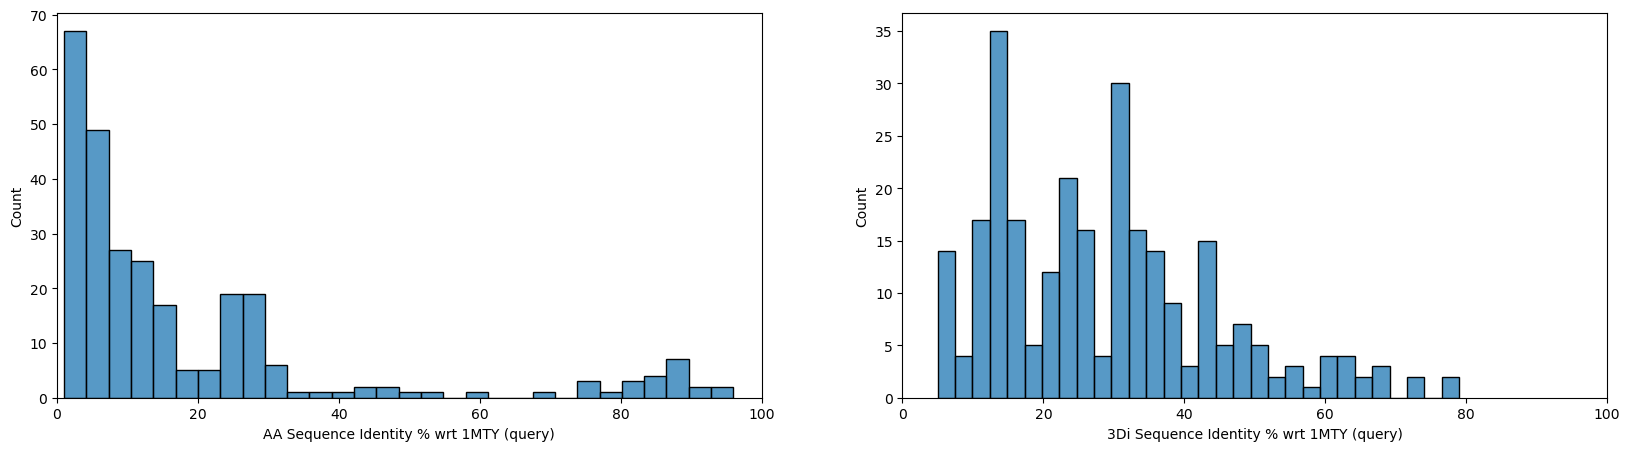

In [27]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.histplot(msa_aa_seq_id_matrix['1MTY_D'], bins=30, ax=ax[0])
sns.histplot(msa_3di_seq_id_matrix['1MTY_D'], bins=30, ax=ax[1])
ax[0].set_xlabel("AA Sequence Identity % wrt 1MTY (query)")
ax[1].set_xlabel("3Di Sequence Identity % wrt 1MTY (query)")
ax[0].set_xlim(0,100)
ax[1].set_xlim(0,100)

Text(0.5, 1.0, 'Distribution of pairwise 3Di Sequence Identity %')

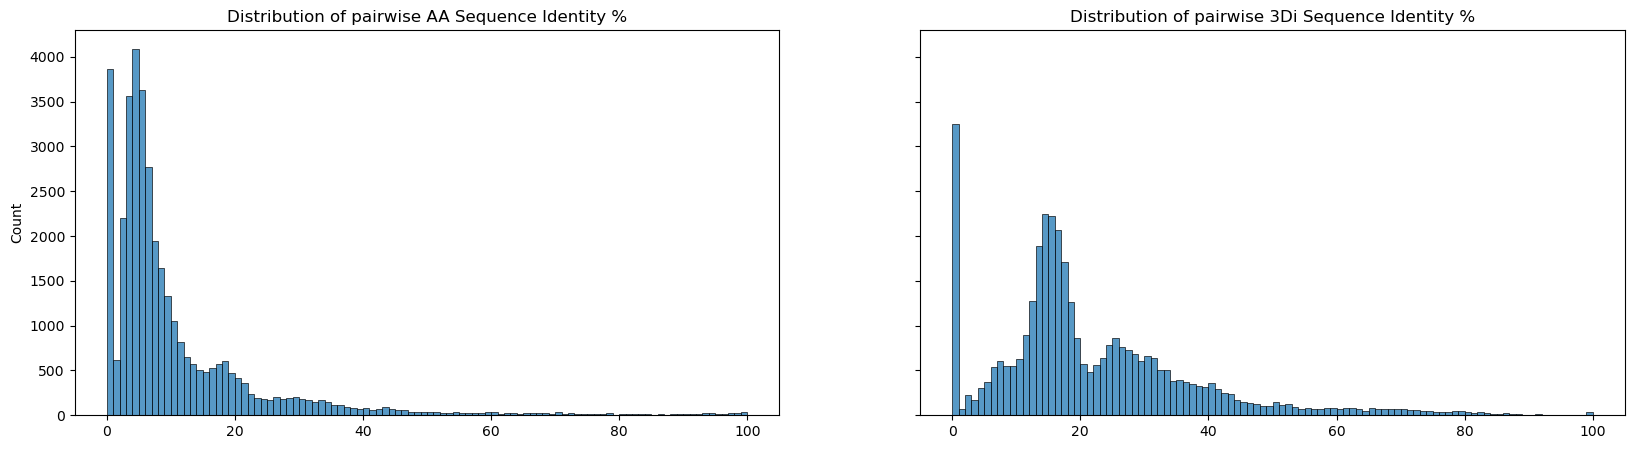

In [28]:
msa_aa_seq_id_pairwise_values = msa_aa_seq_id_matrix.values[np.triu_indices_from(msa_aa_seq_id_matrix.values, k=1)]
msa_3di_seq_id_pairwise_values = msa_3di_seq_id_matrix.values[np.triu_indices_from(msa_3di_seq_id_matrix.values, k=1)]

fig, ax = plt.subplots(1,2, sharey=True, figsize=(20,5))

sns.histplot(msa_aa_seq_id_pairwise_values, bins=100, ax=ax[0])
sns.histplot(msa_3di_seq_id_pairwise_values, bins=100, ax=ax[1])
ax[0].set_title("Distribution of pairwise AA Sequence Identity %")
ax[1].set_title("Distribution of pairwise 3Di Sequence Identity %")

### Mapping the different major group on top of the seqid histograms

In [29]:
msa_3di_seq_id_matrix['1MTY_D']

0      42.0
1      44.0
2      43.0
3      38.0
4      36.0
       ... 
268    15.0
269    15.0
270    13.0
271    14.0
272     8.0
Name: 1MTY_D, Length: 273, dtype: float64

In [30]:
filtered_hits_df = pd.merge(filtered_hits_df, msa_aa_seq_id_matrix[['id', '1MTY_D']], left_on='target', right_on='id', how='left')
filtered_hits_df.rename(columns={'1MTY_D': 'aa_seq_id_wrt_1MTY'}, inplace=True)

filtered_hits_df = pd.merge(filtered_hits_df, msa_3di_seq_id_matrix[['id', '1MTY_D']], left_on='target', right_on='id', how='left')
filtered_hits_df.rename(columns={'1MTY_D': '3di_seq_id_wrt_1MTY'}, inplace=True)

filtered_hits_df.drop(columns=['id_x', 'id_y'], inplace=True)
filtered_hits_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,...,Length,Taxonomic lineage,major_group,lineage_dict,superkingdom,phylum,class,order,aa_seq_id_wrt_1MTY,3di_seq_id_wrt_1MTY
0,1MTY_D,AF-A0A4R8HNW2-F1-model_v4,0.824,512,90,0,1,512,15,526,...,526.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'unclassified Methylosinus', 'supe...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,82.0,79.0
1,1MTY_D,AF-Q842H7-F1-model_v4,0.836,397,65,0,53,449,2,398,...,398.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,83.0,74.0
2,1MTY_D,AF-A0A395D1H6-F1-model_v4,0.849,378,57,0,1,378,15,392,...,394.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'unclassified Methylocystaceae', '...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,85.0,77.0
3,1MTY_D,AF-Q8KM74-F1-model_v4,0.820,400,72,0,48,447,1,400,...,400.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,82.0,74.0
4,1MTY_D,AF-A0A3N0GIB9-F1-model_v4,0.314,508,333,8,6,508,1,498,...,501.0,"cellular organisms (no rank), Bacteria (superk...",Propane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,29.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1MTY_D,AF-A0A1M5GG32-F1-model_v4,0.095,324,241,15,1,286,9,318,...,319.0,"cellular organisms (no rank), Bacteria (superk...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Bacteroidota,Chitinophagia,Chitinophagales,5.0,24.0
268,1MTY_D,AF-A0A1F4X6N4-F1-model_v4,0.065,228,191,7,53,273,3,215,...,221.0,"cellular organisms (no rank), Bacteria (superk...",Different_hydrolases,{'no rank': 'unclassified Candidatus Zixiibact...,Bacteria,Zixiibacteriota,None,None,2.0,14.0
269,1MTY_D,AF-A0A5J4Z166-F1-model_v4,0.064,233,178,8,59,272,3,214,...,215.0,"cellular organisms (no rank), Eukaryota (super...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Eukaryota,Rhodophyta,Bangiophyceae,Porphyridiales,3.0,14.0
270,1MTY_D,AF-A0A345JSP8-F1-model_v4,0.049,203,171,6,53,239,3,199,...,200.0,"cellular organisms (no rank), Bacteria (superk...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Gammaproteobacteria,Thiotrichales,3.0,13.0


(0.0, 100.0)

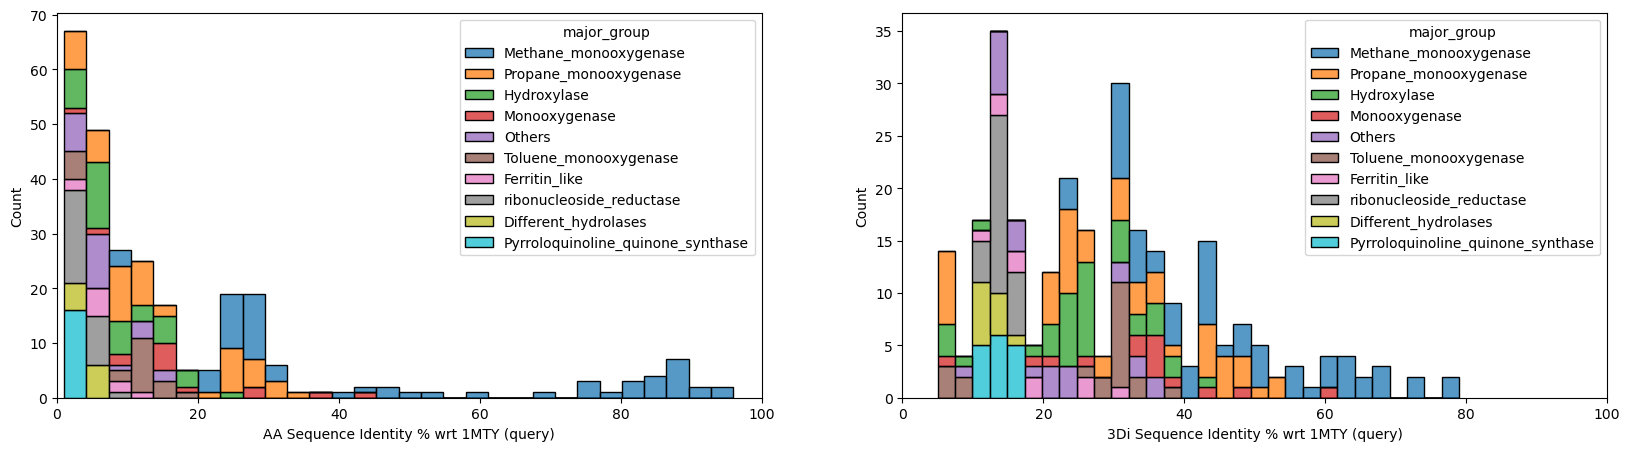

In [31]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.histplot(data=filtered_hits_df, x='aa_seq_id_wrt_1MTY', hue="major_group", multiple="stack", bins=30, ax=ax[0])
sns.histplot(data=filtered_hits_df, x='3di_seq_id_wrt_1MTY', hue="major_group", multiple="stack", bins=30, ax=ax[1])
ax[0].set_xlabel("AA Sequence Identity % wrt 1MTY (query)")
ax[1].set_xlabel("3Di Sequence Identity % wrt 1MTY (query)")
ax[0].set_xlim(0,100)
ax[1].set_xlim(0,100)

### Extracting the top hits for each major group based on RMSD -- for structural comparison

In [56]:
filtered_hits_df.query('major_group == "Pyrroloquinoline_quinone_synthase"').sort_values(by='RMSD', ascending=True)[:1][['target', 'RMSD', 'major_group', 'Protein names']]

,target,RMSD,major_group,Protein names
252,AF-A0A7H0ITU5-F1-model_v4,3.31,Pyrroloquinoline_quinone_synthase,Pyrroloquinoline-quinone synthase (EC 1.3.3.11...


In [52]:
filtered_hits_df.query('major_group == "ribonucleoside_reductase"').sort_values(by='RMSD', ascending=True)[:1][['target', 'RMSD', 'major_group', 'Protein names']]

,target,RMSD,major_group,Protein names
192,AF-Q7MA80-F1-model_v4,2.82,ribonucleoside_reductase,Ribonucleoside-diphosphate reductase subunit b...


In [53]:
filtered_hits_df.query('major_group == "Ferritin_like"').sort_values(by='RMSD', ascending=True)[:1][['target', 'RMSD', 'major_group', 'Protein names']]

,target,RMSD,major_group,Protein names
184,AF-A0A2V6Z5A3-F1-model_v4,2.58,Ferritin_like,Ferritin-like domain-containing protein


#### Corresponding PDB structures for the above hits
`Ferritin_like`: 1B71 \
`Pyrroloquinoline_quinone_synthase`: 1OTV \
`ribonucleoside_reductase`: 5CNT

## Extracting residues from the MSA that are at the Fe-Fe interaction site & aligning them in the order of the phylogenetic tree